In [1]:
# importing general libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs # for generating dataset

Generating **random dataset** with **2 Features**

In [2]:
X, y = make_blobs(n_samples = 950, centers = 3, n_features = 2, random_state=42, cluster_std = 2.5)
print("X shape: ", X.shape)

X shape:  (950, 2)


In [ ]:
# # adding some noise points to the dataset
# total_noise_points = 50
# noise_X = np.random.uniform(low = X[:0].min() * 2, high = X[:1].max() * 2,
#                             size= (total_noise_points, 2))


In [108]:
features = [f"feature_{i+1}" for i in range (X.shape[1])]
# Transforming the nd_array X to a dataframe
data = pd.DataFrame(X, columns = features)
data

,feature_1,feature_2
0,-3.990182,6.854309
1,8.095276,3.594944
2,6.171814,-0.660369
3,-8.688309,7.022048
4,3.524420,-2.750682
...,...,...
945,-6.527906,9.475871
946,-1.940548,12.282143
947,-1.784760,14.202788
948,-7.181998,-5.831278


**Visualizing** the dataset

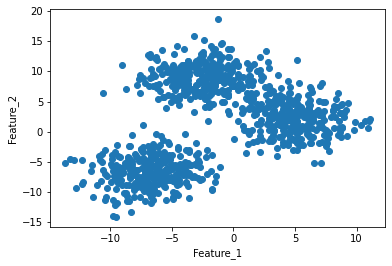

In [4]:
# using scatterplot
plt.scatter(x = data['feature_1'], y = data['feature_2'])
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.show()

**Algorithm for DBSCAN**  
*Step 1*: Initialize the algorithm by selecting an arbitrary point that has not been visited.  
*Step 2*: Retrieve all points in the ε-neighborhood of this point and mark it as visited.  
*Step 3*: If this point has a sufficient number of points in its ε-neighborhood, create a cluster starting with this point.  
*Step 4*: Expand the cluster by adding all reachable points to the cluster.  
*Step 5*: Repeat the process for all unvisited points until all points have been visited.  
*Step 6*: The algorithm terminates when all points have been visited and clustered.  

In [109]:
temp_data = data.copy(deep = True)

In [102]:
def euclidean_distance(pt1, pt2):
    distance = 0
    for i in range(len(pt1)):
        distance += (pt1[i] - pt2[i])**2
    return distance**0.5

def nextId(cluster_Id):
    return cluster_Id + 1

def region_Query(data, point, eps):    # returns index of neighbors of a given point 
    neighbors_index = []
    
    for i in range(len(data)):
        if euclidean_distance(data.iloc[i].values, point) <= eps:
            neighbors_index.append(i)
    return neighbors_index

def assign_cluster_id(temp_data, seeds_index, cluster_Id):   # assigns clusterId to data points
    for i in seeds_index:
        temp_data['clusterId'][i] = cluster_Id

# expand the cluster around a given point
def expand_cluster(temp_data, data, index, point, eps, min_pts, cluster_Id):
    seeds_index = region_Query(data, point, eps) # we get a list of indexes of neighbors of the 'point'
    if len(seeds_index) < min_pts:
        temp_data['clusterId'][index] = -1  # we assign the point as noise
        return False
    else:
        assign_cluster_id(temp_data, seeds_index, cluster_Id)  # see the function implemention above
        seeds_index.remove(index)
        while len(seeds_index) > 0:
            current_point_index = seeds_index[0]
            sub_seed_index = region_Query(data, data.iloc[current_point_index].values, eps)
            if len(sub_seed_index) >= min_pts:
                for sub_idx in sub_seed_index:
                    if temp_data['clusterId'][sub_idx] == None: # if point is unclassified
                        seeds_index.append(sub_idx) # then append it to seed_index
                    temp_data['clusterId'][sub_idx] = cluster_Id
            seeds_index.remove(current_point_index)
        return True

def DBSCAN(data, temp_data, eps, min_pts):
    cluster_Id = -1
    print(data.iloc[0].values)
    temp_data['clusterId'] = np.array([None]* len(data))
    print(data.iloc[0].values)
    for i in range(len(data)):
        if temp_data['clusterId'][i] == None:
            if expand_cluster(temp_data, data, i, data.iloc[i], eps, min_pts, cluster_Id):
                cluster_Id = nextId(cluster_Id)

In [110]:
DBSCAN(data, temp_data, 1.5, 2)

[-3.99018243  6.8543092 ]
[-3.99018243  6.8543092 ]


<ipython-input-102-138e4fbe178d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data['clusterId'][i] = cluster_Id
<ipython-input-102-138e4fbe178d>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data['clusterId'][sub_idx] = cluster_Id
<ipython-input-102-138e4fbe178d>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data['clusterId'][index] = -1  # we assign the point as noise


In [113]:
temp_data['clusterId'].unique()

array([-1, 0, 1, 2], dtype=object)

In [111]:
temp_data

,feature_1,feature_2,clusterId
0,-3.990182,6.854309,-1
1,8.095276,3.594944,-1
2,6.171814,-0.660369,-1
3,-8.688309,7.022048,-1
4,3.524420,-2.750682,-1
...,...,...,...
945,-6.527906,9.475871,-1
946,-1.940548,12.282143,-1
947,-1.784760,14.202788,-1
948,-7.181998,-5.831278,0


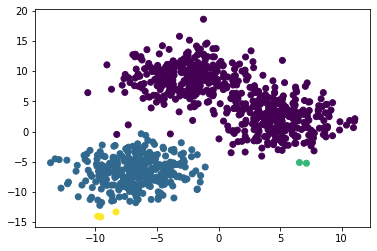

In [112]:
plt.scatter(x=data['feature_1'], y = data['feature_2'], c = temp_data['clusterId'])